In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time

In [2]:
# Set the parameter of Lotka Propensity
def Lotka_prop(y):
    k1 = 1
    k2 = 0.003
    k3 = 1
    
    L_prop = [k1*y[0],k2*y[0]*y[1],k3*y[1]]
    
    return L_prop

In [3]:
def directMethod2(stoich_matrix, tspan, x0):
    
    # Initialization
    num_species = stoich_matrix.shape[1]
    T = tspan[0]
    X = x0
    rxn_count = 1
    t = [T]
    x = [X]
    outputsize = (tspan[1]-tspan[0])/1000
    outputtime = outputsize + tspan[0]
    
    # Main Loop
    while T < tspan[1]:
        reaction_propensities = Lotka_prop(X)
#         print(reaction_propensities)
        a0 = sum(reaction_propensities)
        random_num = np.random.rand(2)
#         print(random_num,a0)
        tau = -np.log(random_num[0])/a0
        cur_sum = 0
        for mu, _rp in enumerate(reaction_propensities):
            cur_sum += _rp
            if cur_sum >= random_num[1]*a0:
                break
            if mu >= len(reaction_propensities):
                mu = None
#         cumsum_a = np.cumsum(reaction_propensities)
        
#         ids = (cumsum_a >= random_num[1]*a0).nonzero()
#         mu = None if not ids else ids[0]
            
        if (T + tau) > outputtime:
            t.append(T)
            x.append(X)
            outputtime = outputtime + outputsize
        T = T + tau
        X = X + stoich_matrix[mu,:]
#         print(mu,cumsum_a.shape, 'ssssss')
        rxn_count += 1
        
    if T >= tspan[1]:
        t.append(T)
        x.append(X)
        
    return t,x

In [4]:
def ssa():
    tspan = [0,50]
    x0 = np.array([200,200])

    stoich_matrix = np.array([[1,0],
                             [-1,1],
                              [0,-1]])


    t,X_state = directMethod2(stoich_matrix,tspan,x0)
    x= np.array(X_state)
    return t,x
# print(t, X_state)

# # Figure 1
# plt.figure(1)
# plt.plot(t, x[:,0])
# plt.xlabel('time (s)')
# plt.ylabel('molecule number of X')

# # Figure 2
# plt.figure(2)
# plt.plot(t, x[:,1])
# plt.xlabel('time (s)')
# plt.ylabel('molecule number of Y')

# # Figure 3 (Phase Plot)
# plt.figure(3)
# plt.plot(x[:,0], x[:,1])
# plt.title('phase plot')

# plt.show()    

In [8]:
start_time = time.process_time()
t,x = ssa()
end_time = time.process_time()
cpu_time_used = end_time-start_time
cpu_time_used

0.359375

In [9]:
len(x)

1002

In [ ]:
start_time = time.process_time()
num_run = 10000
col_name = [f't_{i + 1}' for i in range(num_run)]+[f'x_{i + 1}' for i in range(num_run)] + [f'y_{i + 1}' for i in range(num_run)]
result = []
for i in range(num_run):
    t,x = ssa()
    result_dict = {f't_{i + 1}': t, f'x_{i + 1}': x[:,0], f'y_{i + 1}': x[:,1]}
    result_df = pd.DataFrame(result_dict)
    result.append(result_df)
df = pd.concat(result, axis=1)
end_time = time.process_time()
cpu_time_used = end_time-start_time
print(cpu_time_used)
df.to_csv('Lotka_10000')

In [98]:
thresholds = [10, 20, 30, 40, 50]
row_index = []

for i in thresholds:
    index = (df['t_1']>i).idxmax()
    row_index.append(index)
df_1 = df.loc[row_index].reset_index(drop = True)
# df_1

reshaped_dfs = []
for i in range(len(df_1)):
    x_cols = [col for col in df_1.columns if col.startswith('x_') and int(col.split('_')[1]) <= 100]
    y_cols = [col for col in df_1.columns if col.startswith('y_') and int(col.split('_')[1]) <= 100]

    x_df = pd.DataFrame(df_1.iloc[i][x_cols].values, columns=[f'x_row{i+1}'])

    y_df = pd.DataFrame(df_1.iloc[i][y_cols].values, columns=[f'y_row{i+1}'])
    
    reshaped_dfs.extend([x_df, y_df])

df_2 = pd.concat(reshaped_dfs, axis=1)
# df_2

,x_row1,y_row1,x_row2,y_row2,x_row3,y_row3,x_row4,y_row4,x_row5,y_row5
0,319.0,477.0,301.0,270.0,320.0,404.0,364.0,202.0,204.0,372.0
1,750.0,140.0,41.0,594.0,65.0,91.0,281.0,24.0,1099.0,103.0
2,431.0,487.0,194.0,241.0,385.0,402.0,391.0,274.0,247.0,231.0
3,858.0,485.0,64.0,193.0,470.0,88.0,125.0,559.0,352.0,124.0
4,529.0,668.0,140.0,219.0,594.0,486.0,200.0,200.0,552.0,489.0
...,...,...,...,...,...,...,...,...,...,...
95,351.0,446.0,412.0,221.0,357.0,382.0,226.0,262.0,468.0,396.0
96,403.0,715.0,165.0,92.0,1211.0,251.0,52.0,380.0,433.0,124.0
97,889.0,341.0,70.0,253.0,184.0,28.0,993.0,30.0,92.0,774.0
98,559.0,445.0,196.0,247.0,289.0,584.0,298.0,198.0,323.0,378.0


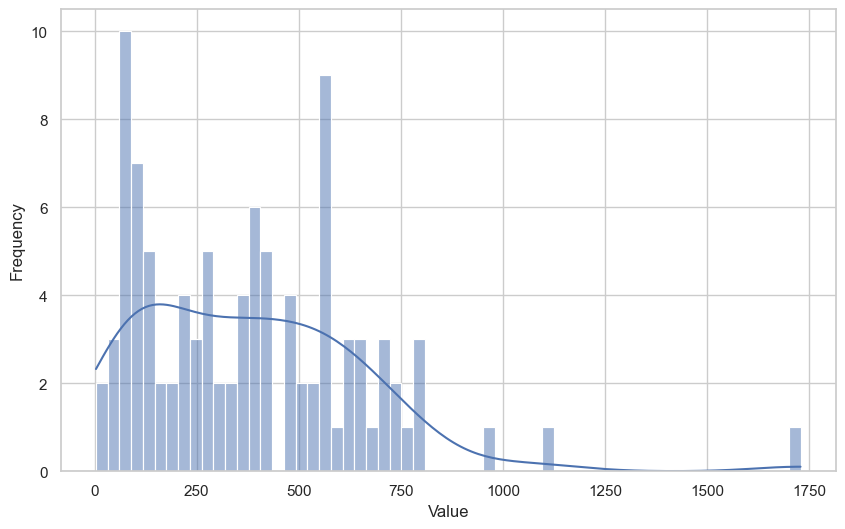

In [108]:
sns.set(style="whitegrid")
# for column in df_2.columns:
plt.figure(figsize=(10, 6))  # Set the figure size for each plot
sns.histplot(df_2['y_row5'], kde=True, bins=60)  # Histogram with KDE
# plt.title(f'Distribution of {column}')  # Set title with the column name
plt.xlabel('Value')  # Label for the X-axis
plt.ylabel('Frequency')  # Label for the Y-axis
plt.show()  # Display the plot

Text(0, 0.5, 'molecule number of X')

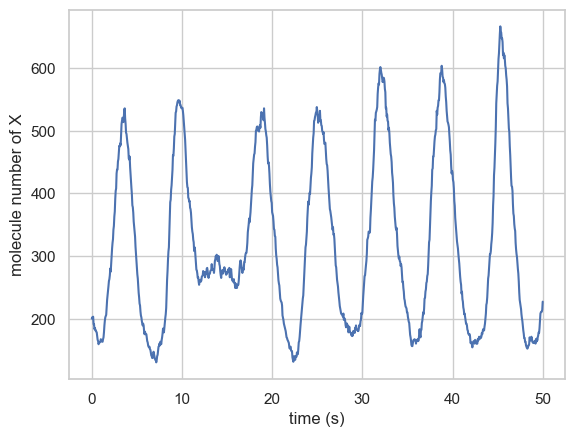

In [130]:
# df.to_csv('results.csv')
# Figure 1
plt.figure(1)
plt.plot(df['t_2'], df['y_2'])
plt.xlabel('time (s)')
plt.ylabel('molecule number of X')

In [ ]:
result

(array([1, 2, 3, 4], dtype=int64),)